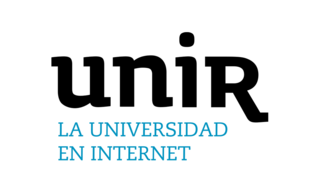

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad: Clasificación con máquinas de vectores de soporte y random forest

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print("Directorio actual:", os.getcwd())
print("Archivos en el directorio actual:", os.listdir())

Directorio actual: C:\Users\ivoto\Downloads
Archivos en el directorio actual: ['.ipynb_checkpoints', 'Actividad 3 (Grupal).docx', 'Actividad_2-CoverType.ipynb', 'Actividad_3_Neurociencia_Cognitiva.pdf', 'covertype', 'covtype.csv.zip', 'desktop.ini', 'ficheros_generados_en_clase_1.zip', 'GRUPAL_nc_ELI.docx', 'maniobras_de_evasin.mobi', 'mia05_act.docx', 'mia_2023-24_Q1_actividad_2_laboratorio.docx', 'Salvatierra-Pedro-Mairal.mobi', 'spyder.py']


In [30]:
# se carga el dataset
df = pd.read_csv('covertype/covtype.csv')
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


¿Cuántas instancias de datos tiene el dataset?

In [31]:
num_instances = df.shape[0]
num_instances

581012

581012


¿Cuántas variables continuas hay en el dataset?

In [32]:
unique_values_per_var = df.nunique().sort_values()
continuous_vars_real = unique_values_per_var[unique_values_per_var > 10]  # Suponiendo que las variables con más de 10 valores únicos son continuas
num_continuous_vars_real = len(continuous_vars_real)

num_continuous_vars_real, continuous_vars_real.index.tolist()

(10,
 ['Slope',
  'Hillshade_Noon',
  'Hillshade_9am',
  'Hillshade_3pm',
  'Aspect',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Elevation',
  'Horizontal_Distance_To_Roadways',
  'Horizontal_Distance_To_Fire_Points'])

 10 variables continuas

¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

In [33]:
categorical_vars = unique_values_per_var[unique_values_per_var <= 2]
num_categorical_vars = len(categorical_vars)
num_categorical_vars

44

hay 44 variables categóricas

¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

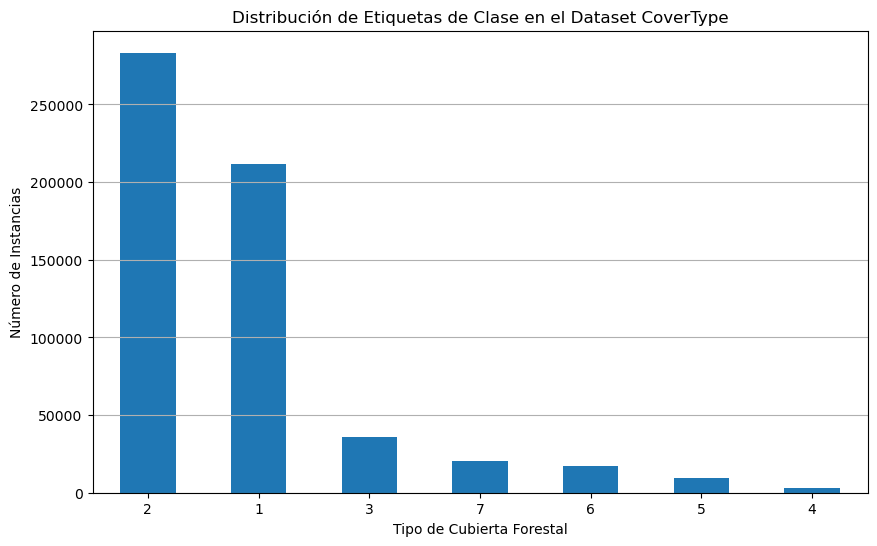

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [34]:
# Contar las instancias de cada etiqueta de clase (en este caso, la variable 'Cover_Type')
class_counts = df['Cover_Type'].value_counts()

# Graficar la distribución de las etiquetas de clase
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Distribución de Etiquetas de Clase en el Dataset CoverType')
plt.xlabel('Tipo de Cubierta Forestal')
plt.ylabel('Número de Instancias')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Mostrar los conteos para una mejor evaluación
class_counts


Observando estos recuentos, es evidente que el conjunto de datos no está balanceado. Los tipos de cubierta forestal 1 y 2 tienen un número significativamente mayor de instancias en comparación con los otros tipos. En particular, los tipos 4 y 5 están representados en menor medida.

¿Existen valores nulos o perdidos en el dataset?

In [35]:
null_values = df.isnull().sum()
total_null_values = null_values.sum()

total_null_values

0

No contiene valores nulos o perdidos

¿Existe alguna variable altamente correlacionada con la variable de clase?

_Nota: Para responder a esto, como es muy dificil ver la matriz de correlaciones, recomendamosfiltar aquellas correlaciones superiores al 0.80 con la variable de clase.

In [36]:
correlation_with_cover_type = df.corr()['Cover_Type'].sort_values()
print(correlation_with_cover_type)

Elevation                            -0.269554
Wilderness_Area1                     -0.203913
Horizontal_Distance_To_Roadways      -0.153450
Soil_Type22                          -0.141746
Soil_Type23                          -0.135055
Soil_Type29                          -0.124933
Horizontal_Distance_To_Fire_Points   -0.108936
Hillshade_Noon                       -0.096426
Soil_Type32                          -0.075562
Soil_Type24                          -0.068746
Soil_Type31                          -0.065347
Soil_Type33                          -0.062502
Hillshade_3pm                        -0.048290
Wilderness_Area2                     -0.048059
Soil_Type19                          -0.036452
Hillshade_9am                        -0.035415
Soil_Type20                          -0.028665
Soil_Type21                          -0.025400
Soil_Type12                          -0.023601
Horizontal_Distance_To_Hydrology     -0.020317
Soil_Type27                          -0.014407
Soil_Type30  

No hay variables altamente correlacionadas (con una correlación ≥ 0.80) con la variable de clase 'Cover_Type'

¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

-Elevation, Wilderness_Area4, Soil_Type10

In [37]:
# Separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, random_state=1)

### Clasificación

**Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

n_estimators = Numero de arboles que vamos a utilizar para generar el bosque.
criterio = Criterio utilizado para evaluar la calidad de una división en los nodos del árbol.n
max_dep = Profundidad máxima de los árbolesth
min_samples_sp =  Número mínimo de muestras necesarias para dividir un nodo internolit
min_samples_ = Número mínimo de muestras que debe tener una hoja del árbolleaf
max_fea = Número máximo de características que se consideran para dividir un nodotures

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

Permite asignar pesos a las clases, es decir, en conjunto de datos, lo cuales estas desequilibrados, unos pueden tener mas peso que otros, haciendo que el modelo quede sesgado.

Si se establece en 'balanced' ajustará automáticamente los pesos de manera inversamente proporcional a las frecuencias de las clases. Es decir, asignará un peso mayor a las clases menos frecuentes y un peso menor a las más frecuentes.

Nos puede ser util ya que nos ayuda a manejar el desequilibrio de clases, mejorar la generalizacion del modelo, controlar la importancia de las clases. En otras palabras, el modelo preste más atención a ciertas clases durante el entrenamiento, lo que puede ser crucial para obtener un rendimiento equilibrado del modelo en todas las clases.

Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

 Es un método basado en árboles de decisión, y los árboles de decisión no son sensibles a la escala de las variables. Ya que estos realizan divisiones (split) las cuales no dependen de la distancia entre puntos y por ende de la escala, sino del criterio a utilizar como gini o entropy 

Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [40]:
# numero de árboles: 5, 10, 20, 50 y 100
from sklearn.ensemble import RandomForestClassifier

n_arboles = [5, 10, 20, 50, 100]
particion = 'gini'
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_feature = 'auto'

randomForest = [RandomForestClassifier(n_estimators = i, criterion= particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features =None) for i in n_arboles]


In [41]:
# Entrenamiento de cada modelo en la lista 'randomForest'
for rf in randomForest:
    rf.fit(X_train, y_train)  # Entrenamiento del modelo

Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

In [69]:
from sklearn.metrics import confusion_matrix
# Identificar el modelo con 20 árboles
modelo_20_arboles = [modelo for modelo in randomForest if modelo.n_estimators == 20][0]

# Hacer predicciones con el conjunto de prueba
y_pred = modelo_20_arboles.predict(X_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[129119,  38610,     14,      0,     48,     51,   1429],
       [ 28493, 196092,    961,      4,    223,    864,     52],
       [     5,   3334,  23801,    156,     47,   1338,      0],
       [     0,      3,    687,   1475,      0,     53,      0],
       [    69,   5883,     84,      0,   1581,      9,      0],
       [     4,   3659,   4171,     72,     13,   6005,      0],
       [  4214,    105,      0,      0,      0,      0,  12082]],
      dtype=int64)

In [70]:
# Número de clasificaciones correctas (suma de la diagonal principal)
correctas = matriz_confusion.diagonal().sum()

# Número total de clasificaciones (suma de todos los valores de la matriz)
total_clasificaciones = matriz_confusion.sum()

# Número de clasificaciones incorrectas
incorrectas = total_clasificaciones - correctas

print(f"Clasificaciones Correctas: {correctas}")
print(f"Clasificaciones Incorrectas: {incorrectas}")


Clasificaciones Correctas: 370155
Clasificaciones Incorrectas: 94655


¿Cuántos ejemplos ha clasificado correctamente?

Clasificaciones Correctas: 370155

Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

In [ ]:
## PON AQUÍ TU CÓDIGO Y RESPUESTA

Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.

Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?


Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

**Support Vector Machine**

In [ ]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

In [ ]:
df = df.head(100000)

Nota: recuerda revisar que esta manera de seleccionar un subconjunto de instancias no altera la clase objetivo. Deberías tener un porcentaje similar de instancias de cada clase. Si no fuera así, deberás cambiar la manera de seleccionar el subconjunto.

In [ ]:
df['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

In [ ]:
# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, random_state=1)


Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

In [ ]:
## PON AQUÍ TU CÓDIGO SI CONSIDERAS QUE HAY QUE NORMALIZAR LOS DATOS

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


scaler = StandardScaler()

## COMPLETAR

Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

In [ ]:
from sklearn.svm import SVC

C = {}
kernel = ''
gamma = ''

svc = [SVC(C=i, kernel=kernel, gamma=gamma) for i in C]
svc

In [ ]:
### PON AQUÍ TU CÓDIGO

In [ ]:
score

Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

In [ ]:
## PON AQUÍ TU CÓDIGO

¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

_indica aquí tu respuesta_

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

In [ ]:
## PON AQUÍ TU CÓDIGO

_indica aquí tu respuesta_

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [ ]:
## PON AQUÍ TU CÓDIGO

Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

### Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
Técnicas de clasificación empleadas y si realiza alguna adaptación.
Principales resultados de la aplicación y de la investigación.